In [1]:
# my virtual environments are rarely properly connected to jupyter so this fixes that. 
# you prolly won't need this cell but running it won't hurt anything either
import sys
import os
current_dir = os.getcwd()  # Get the current working directory
venv_dir = os.path.join(current_dir, 'venv') 
python_version = str(sys.version_info.major) + '.' + str(sys.version_info.minor)
site_packages_path = os.path.join(venv_dir, 'lib', 'python' + python_version, 'site-packages')
sys.path.append(site_packages_path) 

# Model Evaluation / Comparison

In [2]:
from model_comparison import plot_column_from_csv, evaluate_models, format_model_output

In [3]:
models_to_compare = [
    'models/templateGPT/trained/templateGPT_1m_short_and_thicc',
    'models/fractal-head-attention/trained/FHA_1m_short_and_thicc',
    'models/MemoryMosaics/trained/MM_1m'
]

### first up we'll look at loss curves
notice that even with a log scale I had to splice out the first 10% to make the lines distinct

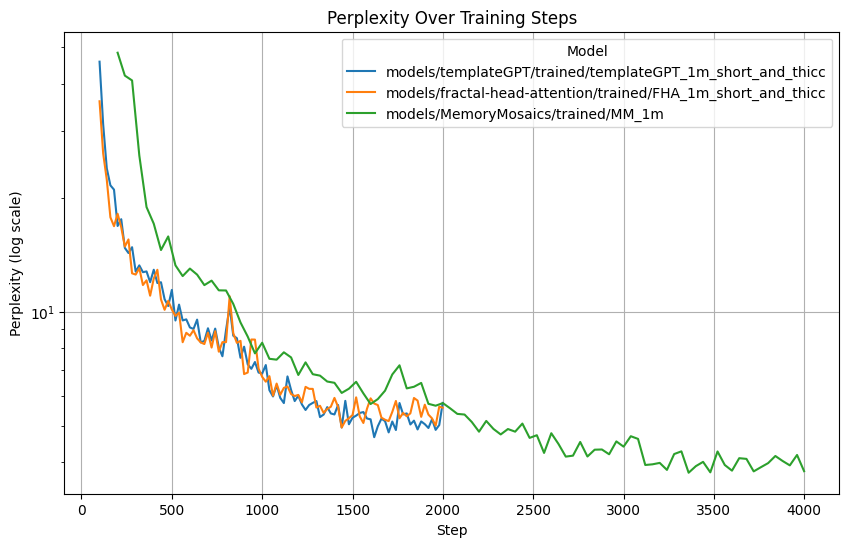

In [4]:
plot_column_from_csv(models_to_compare, 'Step', 'Perplexity', log_y=True, trim_percentage=5)

### now let's compare individual token accuracies
we'll compare topk teacher-forcing accuracies since these models really aren't good enough to be looking at actual inference output
# THIS IS CURRENTLY BROKEN. I NEED TO RE-DESIGN THIS DYNAMIC IMPORTING SYSTEM, IT'S A NIGHTMARE

In [5]:
topk = 5
results = evaluate_models(models_to_compare, topk)
print()

# Display the results for each model
for name, data in results.items():
    format_model_output(name, data, topk, data['tokenizer'], data['correct_indices'])

0
Trying to import from module path: models.templateGPT.config
Trying to import from module path: models.templateGPT.modules.model
Trying to import from module path: models.templateGPT.tokenizers.bpe_v1.tokenizer
934.976 K parameters 
 ModelConfig(dim=64, device='cpu', tokenizer='bpe_v1', vocab_len=8192, num_layers=4, second_resid_norm=False, mlp_hidden_mult=8, mlp_bias=False, mlp_nonlinearity='SiLU', mlp_gated=True, num_q_heads=8, num_kv_heads=1, head_dim=32, theta=10000, max_seq_len=512, scale_first_resid=True, norm_type='RMSNorm', norm_affine=True, norm_bias=True, eps=1e-06, max_batch_size=1)
1
Trying to import from module path: models.fractal-head-attention.config
Trying to import from module path: models.fractal-head-attention.modules.model
Failed to import module: No module named 'modules.fha'


ImportError: Model not found in the specified path.

# in the future it'd be cool to build out an automated GPT-4 rater like what they used in the TinyStories paper

# also once the hyperparameter search module is working i should build a system that performs a regression on the hyperparameters tested to predict teacher-forcing topk accuracy. likely need to include both linear, quadratic, & interaction terms in the regression and then do a lasso to remove useless terms